# 0.0 Tools

## 0.1. Imports


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## 0.2. Load dataset

In [3]:
data = pd.read_csv('Data/HousePrices_HalfMil.csv', sep=';')

In [4]:
data.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


# 1.0 Data Description


At this stage we will understand how the data is and how big the problem we are facing is.

In [5]:
df1 = data.copy()

## 1.1. Data Dimensions

In [6]:
# data dimenstions
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 1000
Number of cols: 7


## 1.2. Data Types


In [7]:
df1.dtypes

precos       int64
area         int64
garagem      int64
banheiros    int64
lareira      int64
marmore      int64
andares      int64
dtype: object

## 1.3. Check NA


In [8]:
df1.isna().sum()

precos       0
area         0
garagem      0
banheiros    0
lareira      0
marmore      0
andares      0
dtype: int64

## 1.4 Columns Description


<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

# 2.0 Preliminary Analysis

In [10]:
df2 = df1.copy()

## 2.1 Descriptive statistics

In [11]:
df2.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## 2.2 Correlation Matrix

In [13]:
df2.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


We see that the greatest correlation between the dependent variable (Y) and the explanatory variables (X's) is between the precos variable and andares. The explanatory variables do not have a strong correlation with each other.

# 3.0 Graphical analysis

In [25]:
df3 = df2.copy()

## 3.1 Plotting the dependent variable (y)

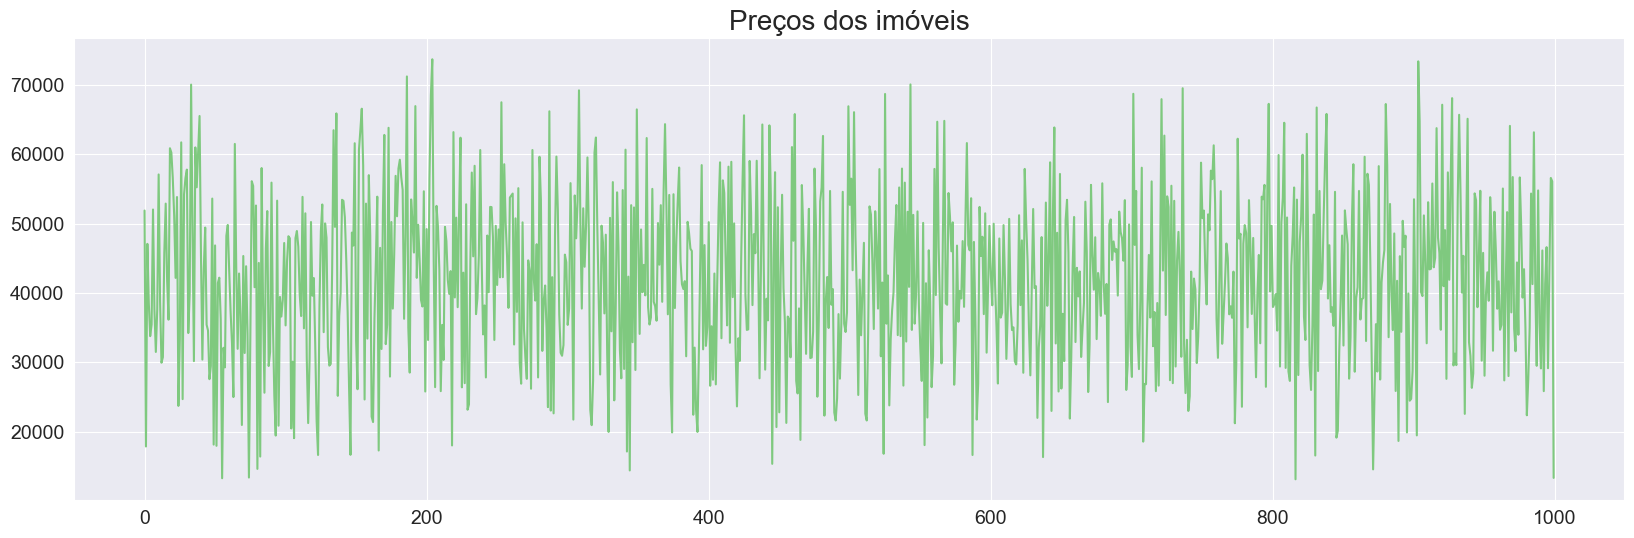

In [55]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Preços dos imóveis', fontsize=20)
ax = df3['precos'].plot(fontsize=14)

## 3.2 Box Plot of y

<Axes: title={'center': 'Preço dos Imóveis'}, ylabel='$'>

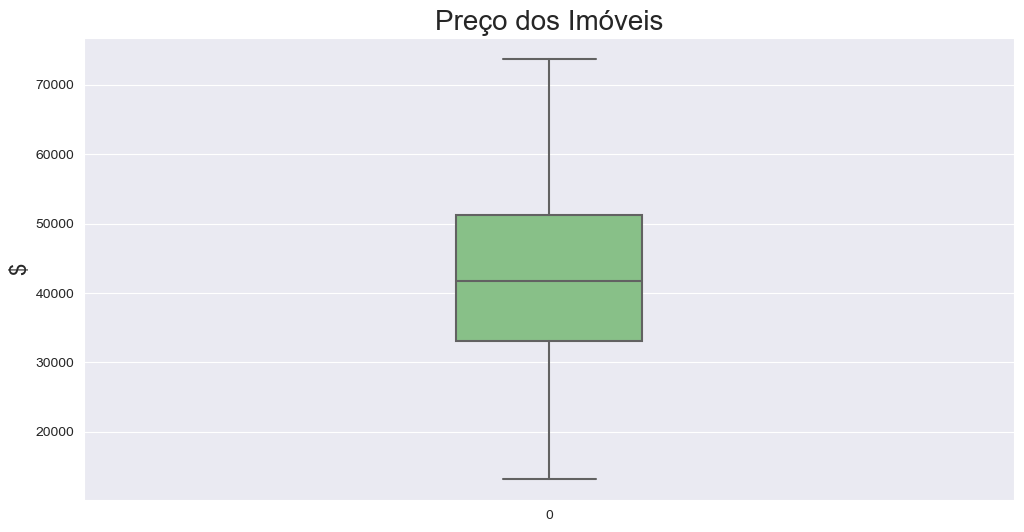

In [54]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

ax = sns.boxplot(data=df3['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax

## 3.3 Box Plot with Two Variables

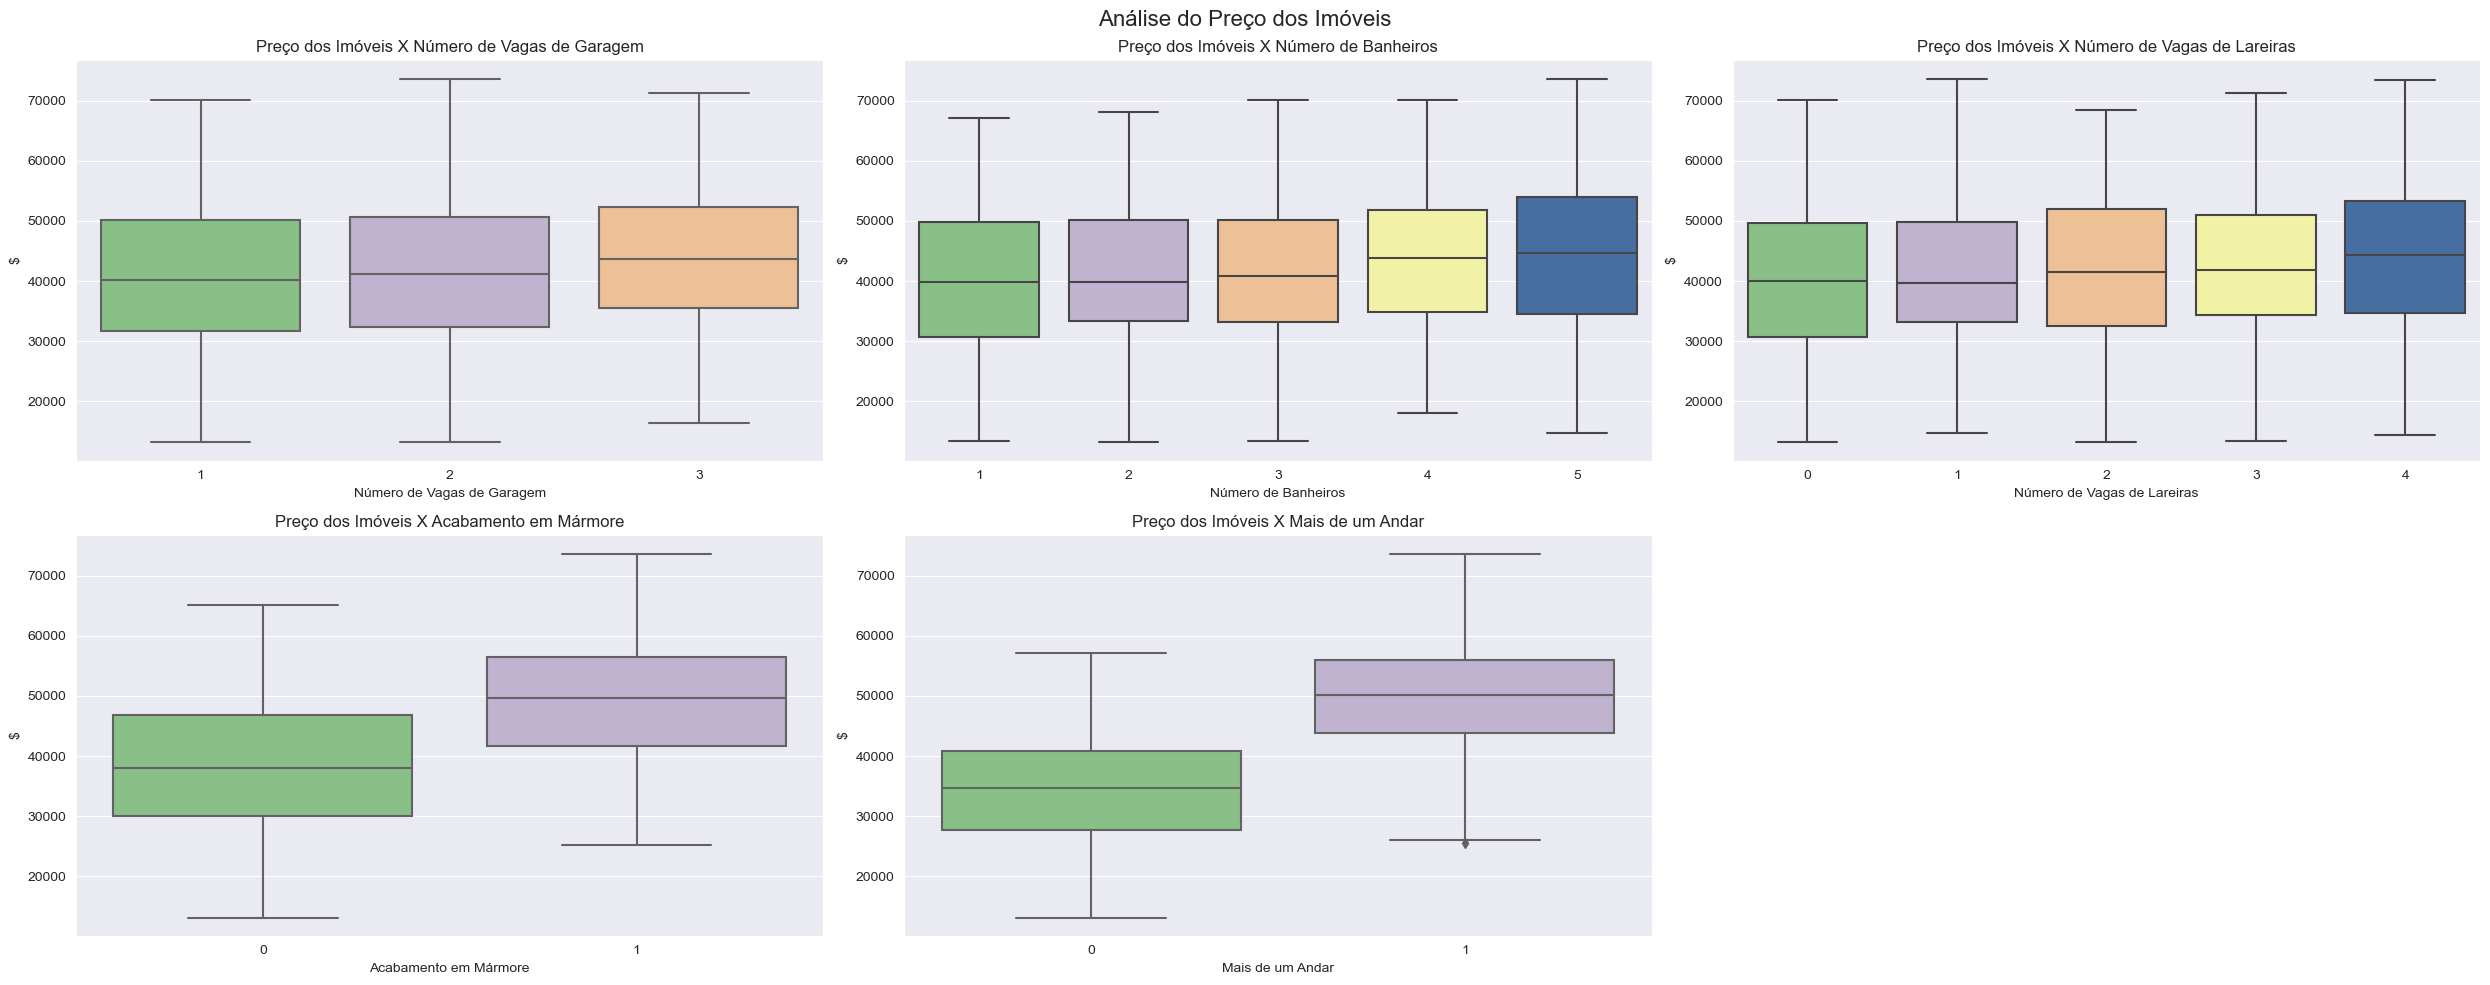

In [53]:
sns.set_palette("Accent")
sns.set_style("darkgrid")


fig, axs = plt.subplots(2, 3, figsize=(25, 10))

# Subplot 1
sns.boxplot(x='garagem', y='precos', data=df3, ax=axs[0, 0])
axs[0, 0].set_xlabel('Número de Vagas de Garagem')
axs[0, 0].set_ylabel('$')
axs[0, 0].set_title('Preço dos Imóveis X Número de Vagas de Garagem')

# Subplot 2
sns.boxplot(x='banheiros', y='precos', data=df3, ax=axs[0, 1])
axs[0, 1].set_xlabel('Número de Banheiros')
axs[0, 1].set_ylabel('$')
axs[0, 1].set_title('Preço dos Imóveis X Número de Banheiros')

# Subplot 3
sns.boxplot(x='lareira', y='precos', data=df3, ax=axs[0, 2])
axs[0, 2].set_xlabel('Número de Vagas de Lareiras')
axs[0, 2].set_ylabel('$')
axs[0, 2].set_title('Preço dos Imóveis X Número de Vagas de Lareiras')

# Subplot 4
sns.boxplot(x='marmore', y='precos', data=df3, ax=axs[1, 0])
axs[1, 0].set_xlabel('Acabamento em Mármore')
axs[1, 0].set_ylabel('$')
axs[1, 0].set_title('Preço dos Imóveis X Acabamento em Mármore')

# Subplot 5
sns.boxplot(x='andares', y='precos', data=df3, ax=axs[1, 1])
axs[1, 1].set_xlabel('Mais de um Andar')
axs[1, 1].set_ylabel('$')
axs[1, 1].set_title('Preço dos Imóveis X Mais de um Andar')

# Remove o subplot 6 que não está sendo utilizado
fig.delaxes(axs[1, 2])

# Adiciona um título geral
fig.suptitle('Análise do Preço dos Imóveis', fontsize=16)

# Ajusta o layout para evitar a sobreposição de títulos
plt.tight_layout()

# Exibe o gráfico
plt.show()


## 3.4 Frequency distribution of the dependent variable (y)

<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='$', ylabel='Frequências'>

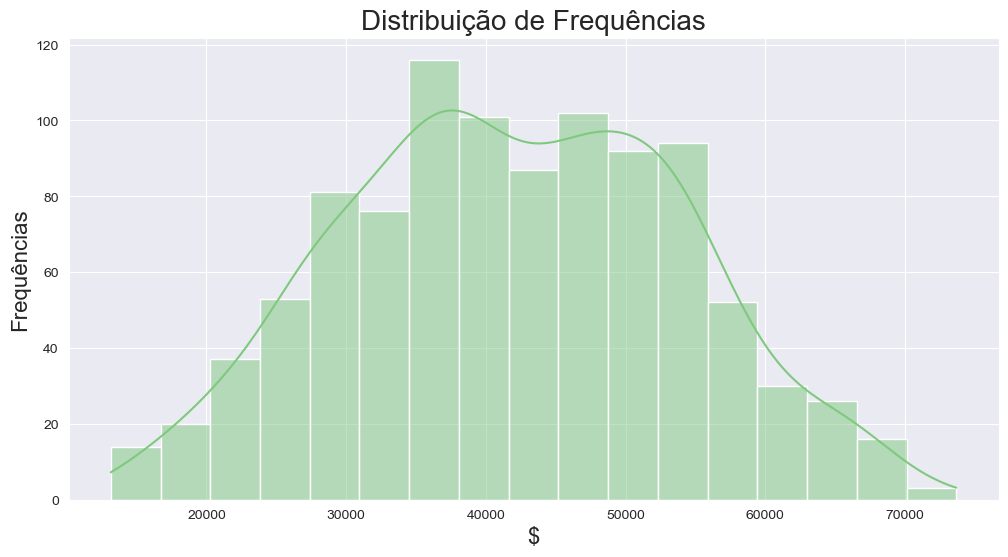

In [58]:
ax = sns.histplot(df3['precos'],  kde=True)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Frequências', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax

Visually it appears to follow a normal distribution, but to be sure it is necessary to carry out statistical tests

## 3.5 Scatter Plots between the dataset variables

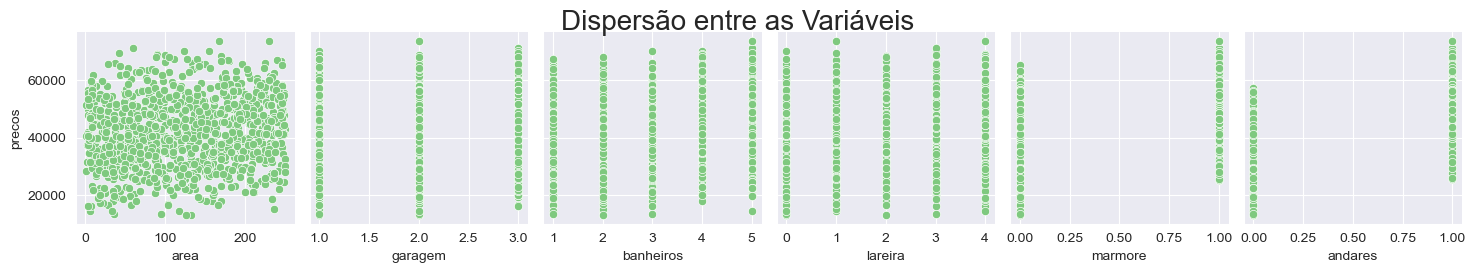

In [60]:
ax = sns.pairplot(df3, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

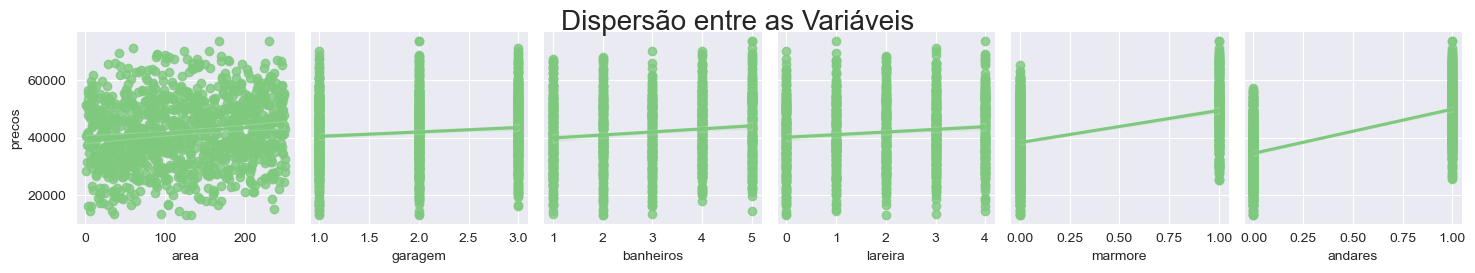

In [61]:
ax = sns.pairplot(df3, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax